In [37]:
from pprint import pprint 
import matplotlib.pyplot as plt
import numpy as nm

# Calculates degree centrality for each vertex

with open("edge_head_to_head.csv", "r", encoding="utf-8") as file:
    file = file.readlines()
    matches = [x.split(",")[1] for x in file][1:]+[x.split(",")[3] for x in file][1:]
    
    degrees = {}
    for match in matches:
        if match not in degrees: degrees[match] = 1
        else: degrees[match] += 1
            
    acc = ""
    counter = 0
    for i in degrees:
        if counter % 3 == 0: 
            print(acc)
            acc = ""
        acc += (i.ljust(19)+" : "+str(degrees[i]))+"   |   "
        counter += 1
    
    deg_list = [degrees[x] for x in degrees]
    print(sum(deg_list)/len(deg_list))
    print(nm.std(deg_list))


Arsenal             : 53   |   Aston Villa         : 29   |   Brighton            : 19   |   
Burnley             : 23   |   Chelsea             : 44   |   Crystal Palace      : 19   |   
Everton             : 29   |   Fulham              : 25   |   Leeds               : 32   |   
Leicester           : 21   |   Liverpool           : 56   |   Man City            : 39   |   
Man Utd             : 52   |   Newcastle           : 31   |   Sheff Utd           : 19   |   
Southampton         : 22   |   Tottenham           : 40   |   West Brom           : 21   |   
West Ham            : 22   |   Wolves              : 24   |   Atletico Madrid     : 48   |   
Real Madrid         : 49   |   Barcelona           : 52   |   Sevilla             : 46   |   
Sociedad            : 25   |   Villarreal          : 37   |   Real Betis          : 26   |   
Granada             : 21   |   Athletic Bilbao     : 41   |   Levante             : 19   |   
Celta Vigo          : 31   |   Cadiz               : 19   |

In [26]:
import pandas

# Fetch rank and market value datas
with open("vertex_head_to_head.csv", "r", encoding="utf-8") as file:
    file = file.readlines()
    col_rank = {x.split(",")[1].strip(): x.split(",")[-1].strip() for x in file[1:]}
    col_marketVal = {x.split(",")[1].strip(): x.split(",")[6] for x in file[1:]}

print(col_rank)
print(col_marketVal)

{'Arsenal': '9', 'Aston Villa': '11', 'Brighton': '16', 'Burnley': '17', 'Chelsea': '4', 'Crystal Palace': '13', 'Everton': '8', 'Fulham': '18', 'Leeds': '10', 'Leicester': '3', 'Liverpool': '7', 'Man City': '1', 'Man Utd': '2', 'Newcastle': '15', 'Sheff Utd': '20', 'Southampton': '14', 'Tottenham': '6', 'West Brom': '19', 'West Ham': '5', 'Wolves': '12', 'Inter': '1', 'AC Milan': '2', 'Juventus': '3', 'Atalanta': '4', 'Napoli': '5', 'Lazio': '6', 'Roma': '7', 'Sassuolo': '8', 'Sampdoria': '9', 'Verona': '10', 'Bologna': '11', 'Udinese': '12', 'Fiorentina': '13', 'Genoa': '14', 'Spezia': '15', 'Torino': '16', 'Benevento': '17', 'Cagliari': '18', 'Parma': '19', 'Crotone': '20', 'Arminia': '15', 'Augsburg': '12', 'B Dortmund': '5', 'B Leverkusen': '6', "B M'gladbach": '7', 'B Munich': '1', 'Cologne': '17', 'E Frankfurt': '4', 'Freiburg': '9', 'Hertha Berlin': '16', 'Hoffenheim': '11', 'Mainz': '13', 'RB Leipzig': '2', 'Schalke': '18', 'Stuttgart': '10', 'Union Berlin': '8', 'W Bremen': '

<AxesSubplot:xlabel='market_value', ylabel='degree'>

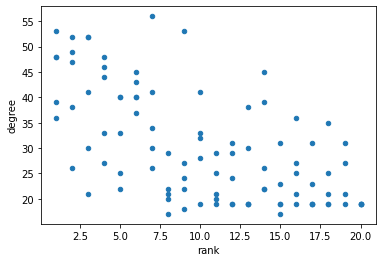

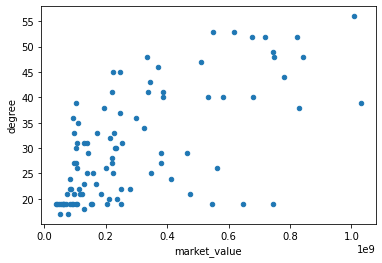

In [32]:
# Create DataFrame of market_value and degrees

sorted_clubs = sorted([deg for deg in degrees])
rank_by_name = [int(col_rank[x]) for x in sorted_clubs]
marketVal_by_name = [int(col_marketVal[x]) for x in sorted_clubs]
deg_by_name = [degrees[x] for x in sorted(degrees)]

df = pandas.DataFrame({
    "rank": rank_by_name,
    "market_value": marketVal_by_name,
    "degree": deg_by_name
}, index = sorted_clubs)

df
# plt.figure()
df.plot.scatter(x="rank",y="degree")
df.plot.scatter(x="market_value", y="degree")

In [13]:
# Calculate correlation between market_value and degree

print("Correlation factor (market-deg): " + str(df["market_value"].corr(df["degree"])))
print("Correlation factor (rank-deg): " + str(df["rank"].corr(df["degree"])))

Correlation factor (market-deg): 0.6467710544984673
Correlation factor (rank-deg): -0.6188090042764273
